# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline


In [3]:
dataset = get_dataset("data/waymo/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 88
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    name = batch['filename']
    img = batch['image'].numpy()
    img_shape = img.shape
    bbox = batch['groundtruth_boxes'].numpy()
    bclass = batch['groundtruth_classes'].numpy()
    
    print('The tfrecord file name is {}'.format(name))
    print('The image shape size is {}'.format(img_shape))
    print('The number of box is {}'.format(len(bbox)))
    print('The number of class is {}'.format(len(bclass)))
    
    _,ax = plt.subplots(1,figsize=(20,10))
    
    colormap = {1:[1,0,0],2:[0,1,0],4:[0,0,1]}
    for cl,bb in zip(bclass,bbox):
        y1,x1,y2,x2 = bb
        y1 = y1*img_shape[0]
        x1 = x1*img_shape[1]
        y2 = y2*img_shape[0]
        x2 = x2*img_shape[1]
        rec = Rectangle((x1,y1),x2-x1,y2-y1,facecolor='none',edgecolor=colormap[cl])
        ax.add_patch(rec)
    plt.imshow(img)
    plt.show()
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

The tfrecord file name is b'segment-1005081002024129653_5313_150_5333_150_with_camera_labels_80.tfrecord'
The image shape size is (640, 640, 3)
The number of box is 11
The number of class is 11


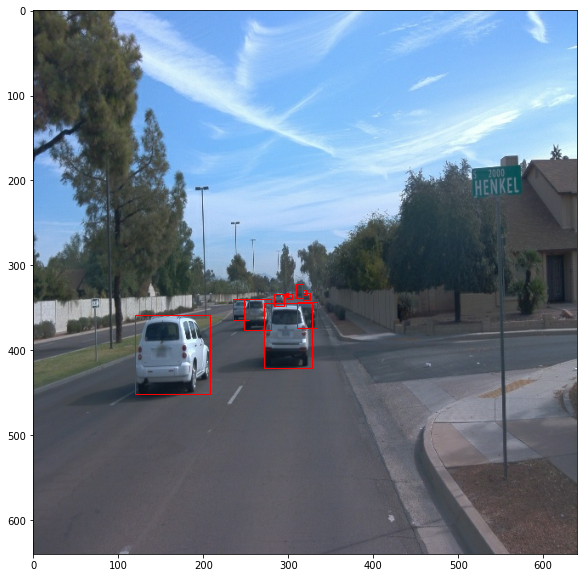

The tfrecord file name is b'segment-11940460932056521663_1760_000_1780_000_with_camera_labels_190.tfrecord'
The image shape size is (640, 640, 3)
The number of box is 65
The number of class is 65


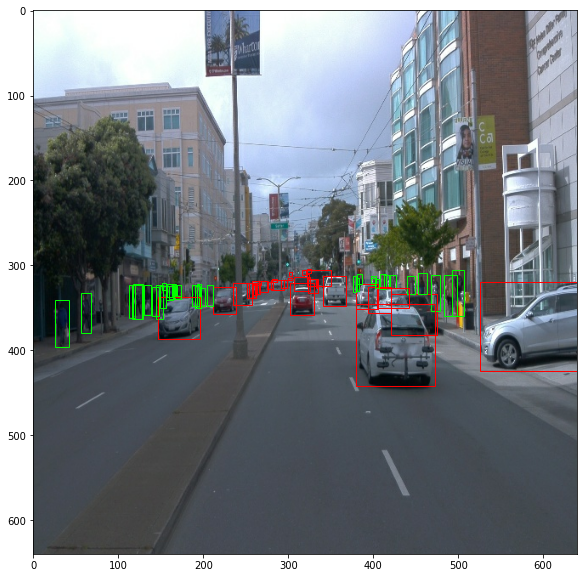

The tfrecord file name is b'segment-1172406780360799916_1660_000_1680_000_with_camera_labels_180.tfrecord'
The image shape size is (640, 640, 3)
The number of box is 10
The number of class is 10


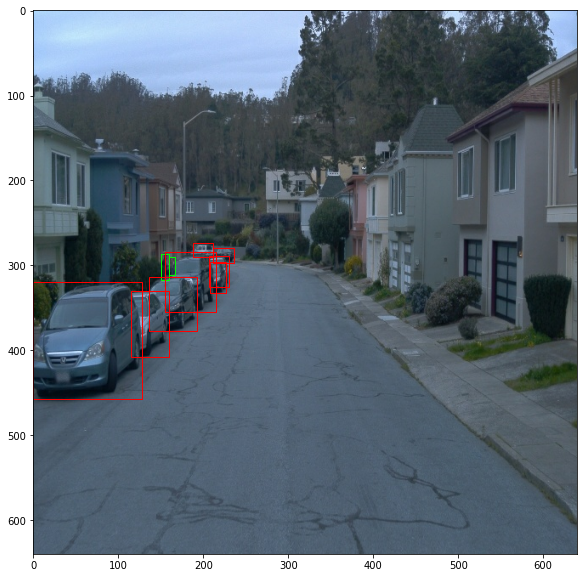

The tfrecord file name is b'segment-1083056852838271990_4080_000_4100_000_with_camera_labels_150.tfrecord'
The image shape size is (640, 640, 3)
The number of box is 17
The number of class is 17


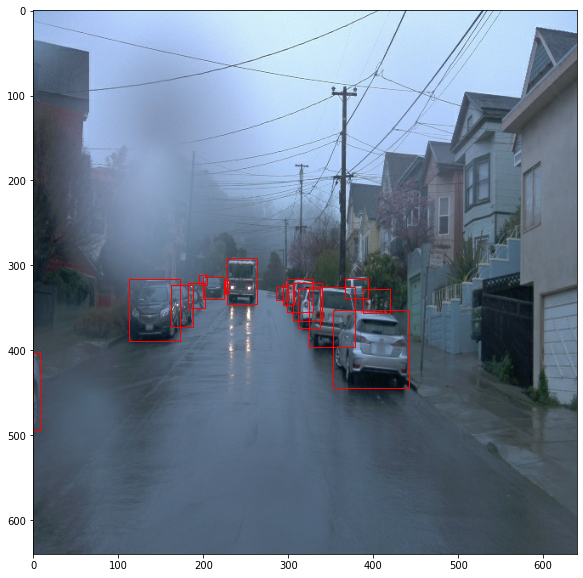

The tfrecord file name is b'segment-10444454289801298640_4360_000_4380_000_with_camera_labels_150.tfrecord'
The image shape size is (640, 640, 3)
The number of box is 34
The number of class is 34


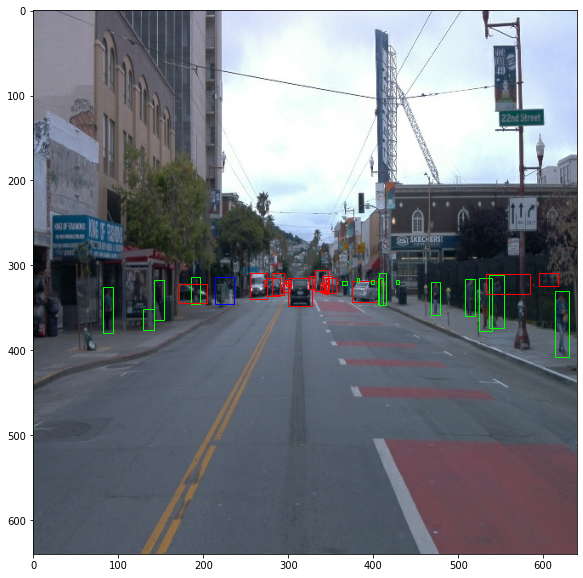

The tfrecord file name is b'segment-11971497357570544465_1200_000_1220_000_with_camera_labels_30.tfrecord'
The image shape size is (640, 640, 3)
The number of box is 41
The number of class is 41


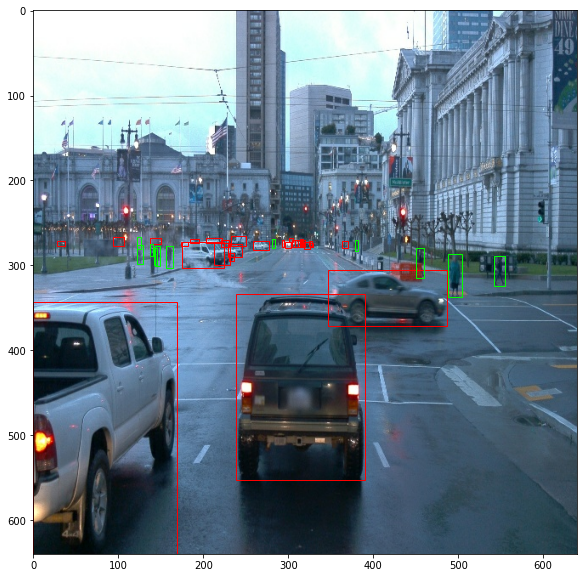

The tfrecord file name is b'segment-10094743350625019937_3420_000_3440_000_with_camera_labels_160.tfrecord'
The image shape size is (640, 640, 3)
The number of box is 29
The number of class is 29


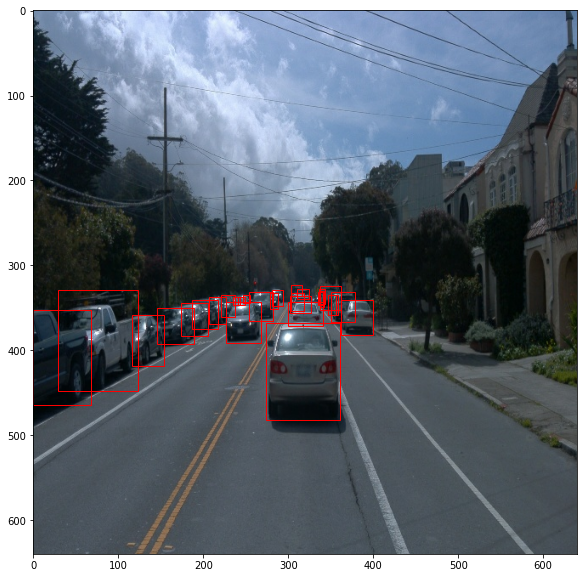

The tfrecord file name is b'segment-12179768245749640056_5561_070_5581_070_with_camera_labels_180.tfrecord'
The image shape size is (640, 640, 3)
The number of box is 5
The number of class is 5


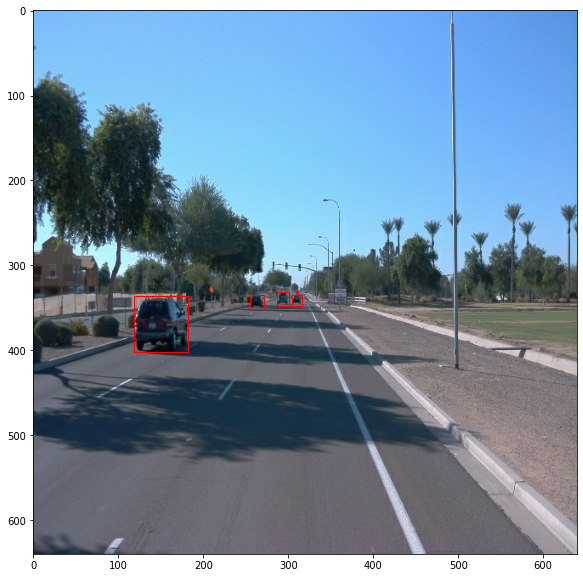

The tfrecord file name is b'segment-10275144660749673822_5755_561_5775_561_with_camera_labels_20.tfrecord'
The image shape size is (640, 640, 3)
The number of box is 18
The number of class is 18


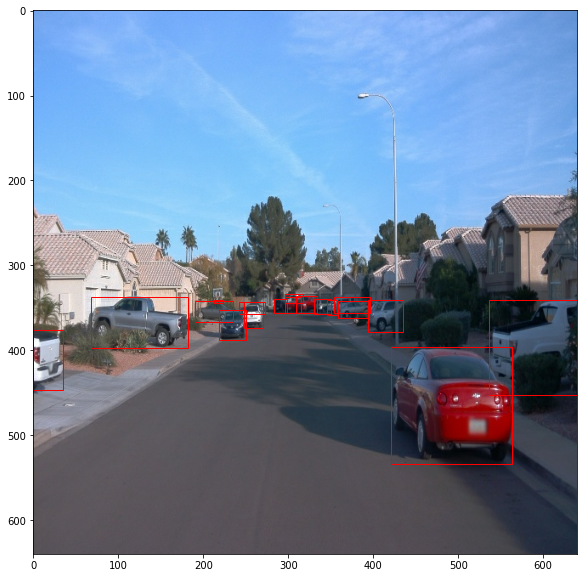

The tfrecord file name is b'segment-10584247114982259878_490_000_510_000_with_camera_labels_70.tfrecord'
The image shape size is (640, 640, 3)
The number of box is 5
The number of class is 5


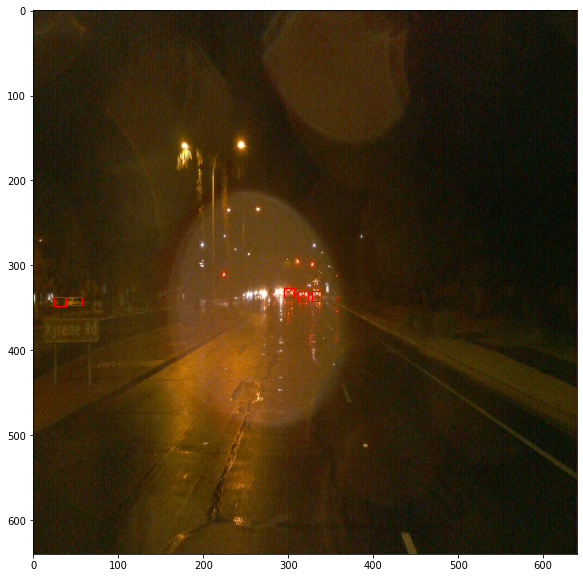

In [14]:
## STUDENT SOLUTION HERE
for batch in dataset.take(10):
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

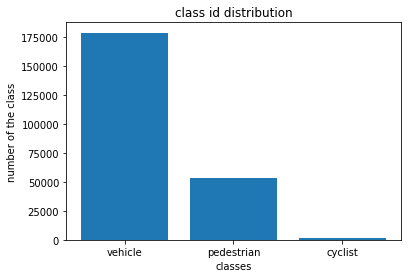

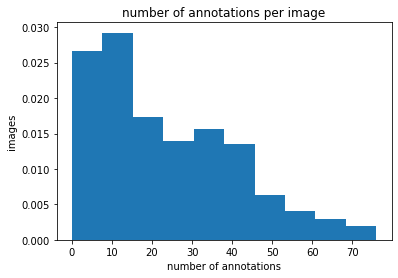

In [7]:
def display_data_chart(dataset):
    '''
    plot the tfrecord data analysis
    arg: -dataset[tfrecord]
    '''
    total_class={'class_id':[],'anno_num':[]}
    
    #list the class id and the number of class id
    for data in dataset.take(10000):
        class_value = data['groundtruth_classes'].numpy()
        total_class['class_id'].extend(class_value)
        total_class['anno_num'].append(len(class_value))
    all_class = np.array(total_class['class_id'])
    
    #sum each class id
    sum_class=np.array([(all_class==1).sum(),(all_class==2).sum(),(all_class==4).sum()])
    name = np.array(['vehicle','pedestrian','cyclist'])
    
    #plot the bar chart for the class distribution
    plt.bar(name,sum_class)
    plt.title('class id distribution')
    plt.xlabel('classes')
    plt.ylabel('number of the class')
    plt.show()
    
    #plot the histogram of the number of annotations
    plt.hist(total_class['anno_num'],density=True)
    plt.title('number of annotations per image')
    plt.xlabel('number of annotations')
    plt.ylabel('images')
    plt.show()

display_data_chart(dataset)
    
    
    
    